In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import sys
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score


# 1 EDA

### 1.1 Summary Statistics

In [2]:
df_train = pd.read_csv('train.csv')
df_test =pd.read_csv('test.csv')

In [3]:
print("Train data shape: ",df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape:  (15120, 56)
Test data shape:  (565892, 55)


In [4]:
df_train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
Id                                    15120 non-null int64
Elevation                             15120 non-null int64
Aspect                                15120 non-null int64
Slope                                 15120 non-null int64
Horizontal_Distance_To_Hydrology      15120 non-null int64
Vertical_Distance_To_Hydrology        15120 non-null int64
Horizontal_Distance_To_Roadways       15120 non-null int64
Hillshade_9am                         15120 non-null int64
Hillshade_Noon                        15120 non-null int64
Hillshade_3pm                         15120 non-null int64
Horizontal_Distance_To_Fire_Points    15120 non-null int64
Wilderness_Area1                      15120 non-null int64
Wilderness_Area2                      15120 non-null int64
Wilderness_Area3                      15120 non-null int64
Wilderness_Area4                      15120 non-null int64
Soil_T

In [6]:
df_train.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


### 1.2 Missing Value

In [7]:
df_train.isnull().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


In [8]:
df_test.isnull().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


### 1.3 Target Variable Distribution

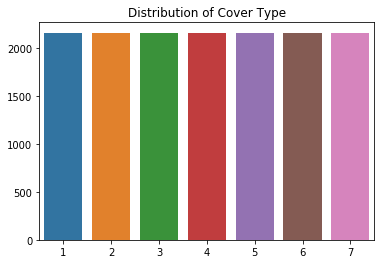

In [9]:
plt.title('Distribution of Cover Type')
sns.barplot(df_train['Cover_Type'].value_counts().index, df_train['Cover_Type'].value_counts().values)
plt.show()

### 1.4 Categorical Variables

In [22]:
df['Wilderness'] = df['Wilderness_Area1']+df['Wilderness_Area2']+df['Wilderness_Area3']+df['Wilderness_Area4']

In [23]:
df['Wilderness'].value_counts()

1    15120
Name: Wilderness, dtype: int64

In [24]:
Soil_list = [x for x in df.columns if 'Soil_' in x]

In [26]:
df['Soil'] = 0

In [27]:
for x in Soil_list:
    df['Soil'] = df['Soil']+ df[x]

In [28]:
df['Soil'].value_counts()

1    15120
Name: Soil, dtype: int64

In [10]:
Wildness_List = [x for x in df_train.columns if 'Wilderness' in x]

In [11]:
Soil_List = [x for x in df_train.columns if 'Soil_' in x]

In [12]:
df_train['Wilderness'] = 0

In [13]:
for i,x in enumerate(Wildness_List):
    df_train['Wilderness'][df_train[x]==1] = i+1

In [14]:
df_train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Wilderness
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,5,1
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,5,1
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,2,1
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,2,1
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,5,1


In [15]:
df_train['Wilderness'].value_counts()

3    6349
4    4675
1    3597
2     499
Name: Wilderness, dtype: int64

In [16]:
df_train['Soil'] = 0

In [17]:
for i,x in enumerate(Soil_List):
    df_train['Soil'][df_train[x]==1] = i+1

#### Two Way Table for Wilderness

In [18]:
pd.crosstab(df_train['Wilderness'],df_train['Cover_Type'])

Cover_Type,1,2,3,4,5,6,7
Wilderness,,,,,,,
1,1062,1134,0,0,856,0,545
2,181,66,0,0,0,0,252
3,917,940,863,0,1304,962,1363
4,0,20,1297,2160,0,1198,0


In [19]:
pd.crosstab(df_train['Soil'],df_train['Cover_Type'])

Cover_Type,1,2,3,4,5,6,7
Soil,,,,,,,
1,0,0,121,139,0,95,0
2,0,3,283,94,61,182,0
3,0,12,133,799,0,18,0
4,5,20,462,133,129,87,7
5,0,0,55,39,0,71,0
6,0,7,248,244,0,151,0
8,0,1,0,0,0,0,0
9,1,9,0,0,0,0,0
10,9,81,717,170,64,1101,0


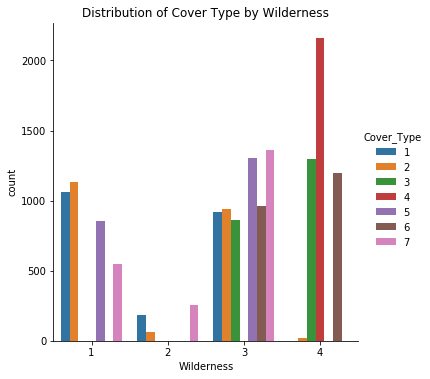

In [20]:
sns.catplot(data=df_train, kind='count', x='Wilderness', hue='Cover_Type')
plt.title('Distribution of Cover Type by Wilderness')
plt.show()

### 1.5 Continuous Variabels

### Histogram

In [21]:
df_train.groupby(['Cover_Type']).mean()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness,Soil
Cover_Type,,,,,,,,,,,,,,,,,,,,,
1,7996.077778,3128.025926,159.463426,13.112963,271.507407,41.281481,2579.715741,211.690278,223.248611,144.065741,...,0.085185,0.000000,0.001389,0.000000,0.000000,0.037037,0.036574,0.022685,1.932870,27.659259
2,6312.696759,2922.540278,151.097222,13.423611,287.728704,47.337963,2425.791667,214.044444,225.369907,142.950926,...,0.085185,0.005556,0.000463,0.000926,0.000000,0.003241,0.001389,0.001389,1.928704,24.589815
3,8127.537500,2398.423148,173.672685,20.628704,210.723148,64.081944,969.595833,201.655556,216.561111,141.549537,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.600463,6.375926
4,6354.585648,2223.420370,138.099537,18.468519,104.537500,40.143519,915.100463,227.968056,216.889815,111.808796,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,7.065278
5,6486.800463,2786.801389,137.992130,16.724537,208.873148,50.871296,1329.318519,223.368981,218.317130,121.392593,...,0.053241,0.001852,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.207407,21.686574
6,8061.305093,2423.276852,180.617130,18.986111,160.095370,44.873611,1064.980556,193.562963,209.960648,147.682407,...,0.030556,0.000926,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.554630,10.150463
7,9584.496759,3362.769907,155.794444,14.166667,346.904630,68.945833,2713.659722,216.639815,222.412037,136.193981,...,0.031019,0.001852,0.045370,0.003704,0.015741,0.296759,0.266204,0.188426,2.378704,36.672222


In [22]:
con_var_list = [x for x in df_train.columns if ('Wilderness' not in x and 'Soil' not in x and 'Id' not in x and 'Cover_Type' not in x)]

In [23]:
con_var_list

['Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points']

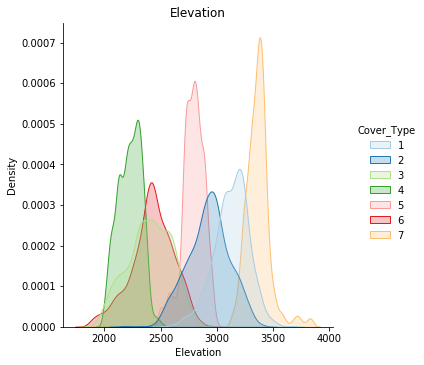

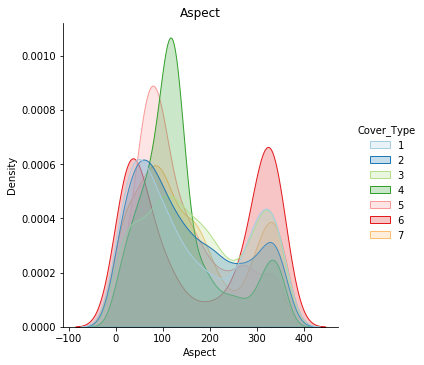

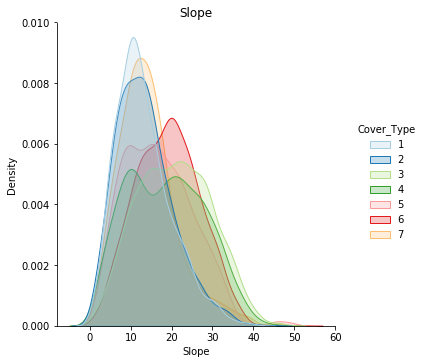

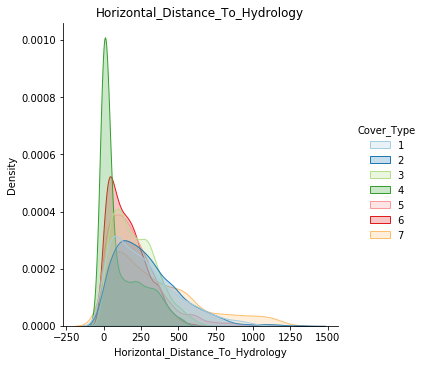

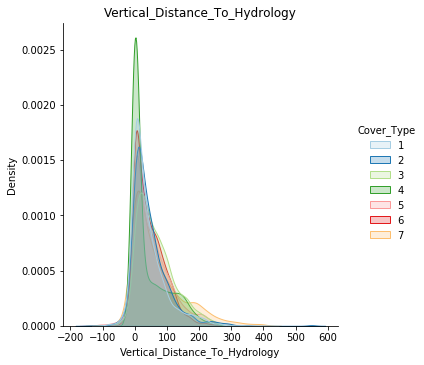

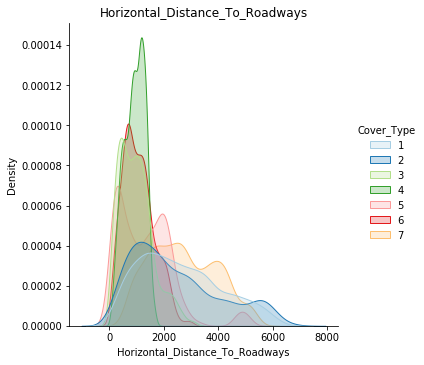

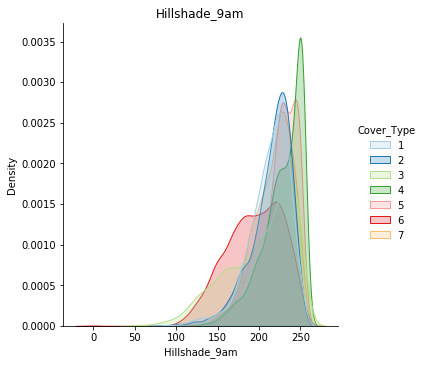

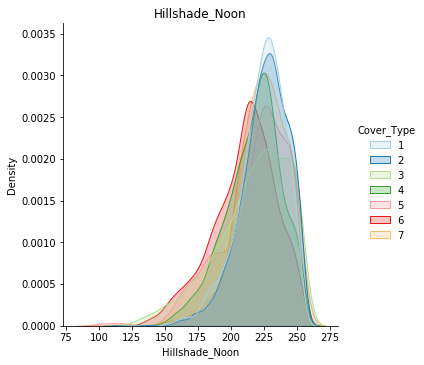

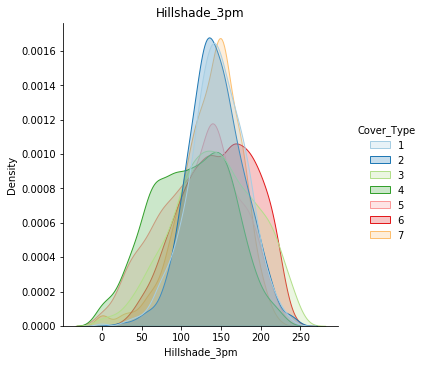

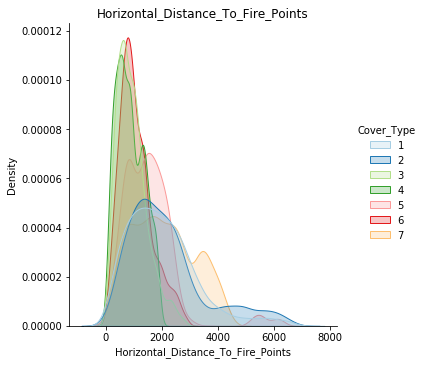

In [24]:
for x in con_var_list:
    sns.displot(df_train,x =df_train[x], hue='Cover_Type', kind='kde', fill=True, palette='Paired')
    plt.title(x)
    plt.show()

### Boxplot

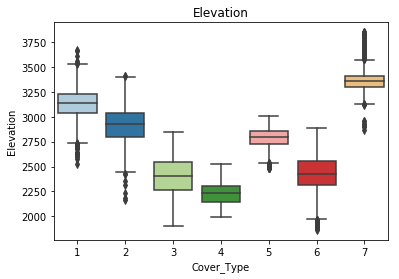

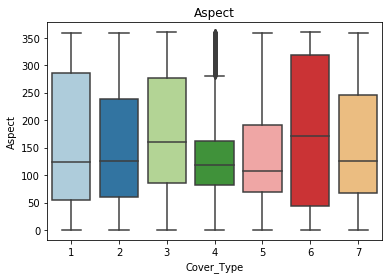

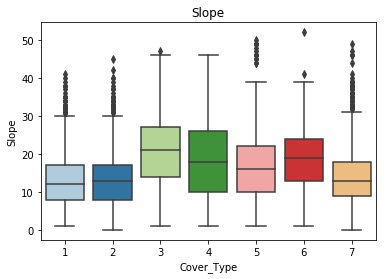

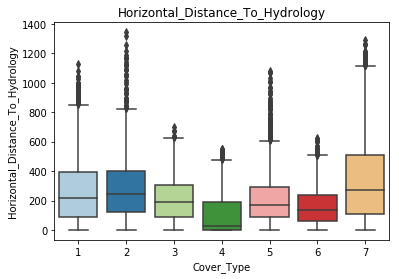

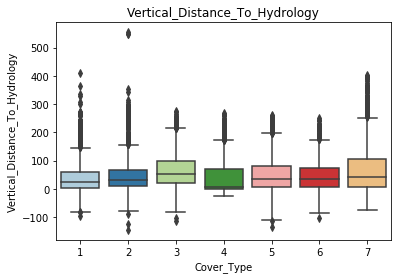

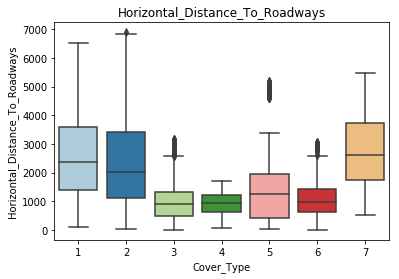

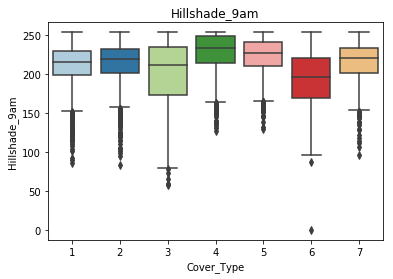

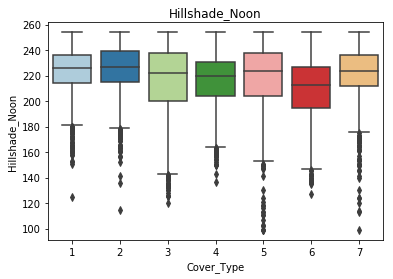

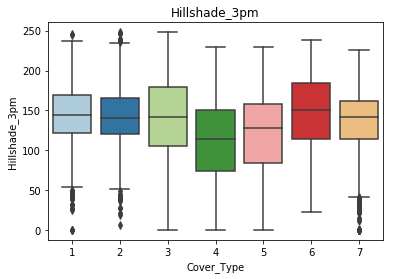

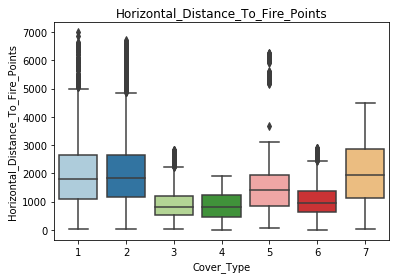

In [25]:
for x in con_var_list:
    sns.boxplot(x='Cover_Type',y=x,data=df_train,palette='Paired')
    plt.title(x)
    plt.show()

### Corrlation Matrix

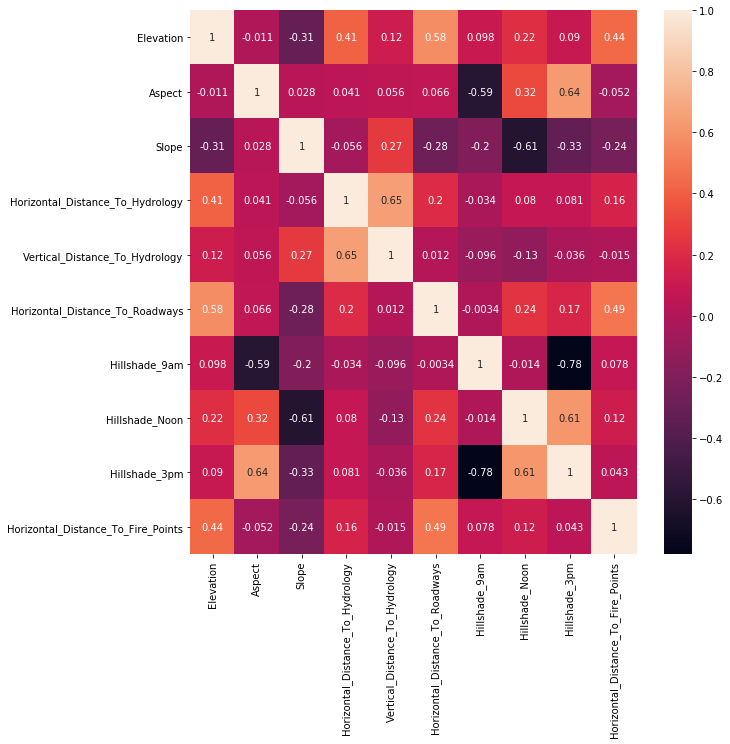

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(df_train[con_var_list].corr(), annot=True)
plt.show()

# 2 Modeling

In [76]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV 

### Self Define Functions

In [77]:
def plot_roc_cur_multiclass(model, x, y, num_class):
    probs = model.predict_proba(x)
    y_new = pd.get_dummies(y, prefix='Target')
    for i in range(num_class):
        fper, tper, thresholds = roc_curve(y_new['Target_'+str(i)], probs[:,i]) 
        plt.plot(fper, tper, color='orange', label='ROC')
        plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve for Target ' + str(i))
        plt.legend()
        plt.show()

In [78]:
def create_feature_importance(model, x, topn=20):
    importances = list(model.feature_importances_)
    feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(x_train.columns, importances)]
    feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
    [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]
    ls1 = [x[0] for x in feature_importances][:topn]
    ls2 = [x[1] for x in feature_importances][:topn]
    ls1.reverse()
    ls2.reverse()
    plt.barh(ls1, ls2)

In [79]:
from sklearn import cross_validation, metrics
def modelfit_multiclass(alg, x_train, y_train, x_test, y_test, num_class, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
                
    #Print model report:
    print ("\nModel Report")
    
    print ("Accuracy (Train) : %.4g" % metrics.accuracy_score(y_train.values, alg.predict(x_train)))
    print ("Accuracy (Test) : %.4g" % metrics.accuracy_score(y_test.values, alg.predict(x_test)))
    
    y_train_probs = alg.predict_proba(x_train)
    y_test_probs = alg.predict_proba(x_test)
    y_train_new = pd.get_dummies(y_train, prefix='Target')
    y_test_new = pd.get_dummies(y_test, prefix='Target')
    
    for i in range(num_class):    
        print ("AUC Score for Target %d (Train): %f" % (i, metrics.roc_auc_score(y_train_new['Target_'+str(i)], y_train_probs[:,i])))
        print ("AUC Score for Target %d (Test): %f" % (i, metrics.roc_auc_score(y_test_new['Target_'+str(i)], y_test_probs[:,i])))
    
    create_feature_importance(alg,x_train)                
    #feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    #feat_imp.plot(kind='bar', title='Feature Importances')
    #plt.ylabel('Feature Importance Score')

In [80]:
X = df_train.drop([ 'Id','Cover_Type', 'Wilderness', 'Soil'],axis=1)
y= df_train['Cover_Type']
y = y-1

In [81]:
X.shape

(15120, 54)

In [82]:
y.shape

(15120,)

In [83]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [84]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(10584, 54)
(10584,)
(4536, 54)
(4536,)


In [85]:
xgb_model = xgb.sklearn.XGBClassifier(nthread=-1, seed=42, use_label_encoder=False)
xgb_model.fit(x_train, y_train)

[12:24:46] WARNING: D:\Build\xgboost\xgboost-1.3.1.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=8, nthread=-1, num_parallel_tree=1,
       objective='multi:softprob', random_state=42, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=None, seed=42, subsample=1,
       tree_method='exact', use_label_encoder=False, validate_parameters=1,
       verbosity=None)


Model Report
Accuracy (Train) : 0.9934
Accuracy (Test) : 0.8382
AUC Score for Target 0 (Train): 0.999830
AUC Score for Target 0 (Test): 0.965074
AUC Score for Target 1 (Train): 0.999751
AUC Score for Target 1 (Test): 0.947702
AUC Score for Target 2 (Train): 0.999966
AUC Score for Target 2 (Test): 0.977799
AUC Score for Target 3 (Train): 1.000000
AUC Score for Target 3 (Test): 0.997932
AUC Score for Target 4 (Train): 0.999996
AUC Score for Target 4 (Test): 0.993104
AUC Score for Target 5 (Train): 0.999943
AUC Score for Target 5 (Test): 0.980827
AUC Score for Target 6 (Train): 1.000000
AUC Score for Target 6 (Test): 0.997120
Variable: Soil_Type30          Importance: 0.11999999731779099
Variable: Wilderness_Area4     Importance: 0.09000000357627869
Variable: Elevation            Importance: 0.07999999821186066
Variable: Soil_Type10          Importance: 0.05999999865889549
Variable: Soil_Type12          Importance: 0.05999999865889549
Variable: Soil_Type3           Importance: 0.03999999

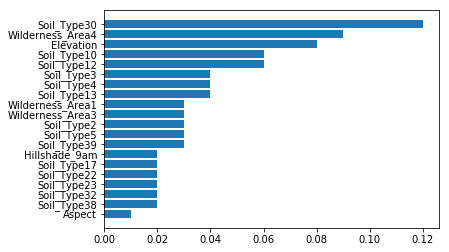

In [86]:
modelfit_multiclass(xgb_model, x_train, y_train, x_test, y_test, num_class=7)

### Random Search

In [102]:
param_test = {
 'learning_rate':[0.0001, 0.0005, 0.001,0.01,0.1,0.2],
  'n_estimators':[400,500,600,700,800,900,1000,1500],
 'max_depth':[4,5,6,7,8,9,10],
 'min_child_weight': [1],
 'reg_alpha':[0, 0.001, 0.01, 0.1, 1, 5, 10, 100],
 'reg_lambda':[0, 0.001, 0.01, 0.1, 1, 5, 10, 100],
 'gamma':[0, 0.001, 0.01, 0.1, 1, 5, 10, 100],
 'subsample':[0.8],
 'colsample_bytree':[0.8],
 'objective':['multi:softprob']
}
xgb_random = RandomizedSearchCV(estimator = xgb.sklearn.XGBClassifier(), param_distributions = param_test, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
xgb_random.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:93: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 46.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 100.2min finished


[14:18:05] WARNING: D:\Build\xgboost\xgboost-1.3.1.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=None, gamma=None,
       gpu_id=None, importance_type='gain', interaction_constraints=None,
       learning_rate=None, max_delta_step=None, max_depth=None,
       min_child_w...e,
       tree_method=None, use_label_encoder=True, validate_parameters=None,
       verbosity=None),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'learning_rate': [0.0001, 0.0005, 0.001, 0.01, 0.1, 0.2], 'n_estimators': [400, 500, 600, 700, 800, 900, 1000, 1500], 'max_depth': [4, 5, 6, 7, 8, 9, 10], 'min_child_weight': [1], 'reg_alpha': [0, 0.001, 0.01, 0.1, 1, 5, 10, 100], 'reg_lambda': [0, 0.001, 0.01, 0.1, 1, 5, 10, 100], 'gamma': [0, 0.001, 0.01, 0.1, 1, 5, 10, 100], 'subsample': [0.8], 'colsample_bytree': [0.8], 'objective': ['multi:softprob']},
          pre_dispatch='2*n_jobs', ra

In [103]:
xgb_random.grid_scores_

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.76606, std: 0.00960, params: {'subsample': 0.8, 'reg_lambda': 10, 'reg_alpha': 1, 'objective': 'multi:softprob', 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 5, 'colsample_bytree': 0.8},
 mean: 0.72950, std: 0.00733, params: {'subsample': 0.8, 'reg_lambda': 0.1, 'reg_alpha': 10, 'objective': 'multi:softprob', 'n_estimators': 1000, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 10, 'colsample_bytree': 0.8},
 mean: 0.76313, std: 0.00571, params: {'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 0.1, 'objective': 'multi:softprob', 'n_estimators': 900, 'min_child_weight': 1, 'max_depth': 9, 'learning_rate': 0.0001, 'gamma': 10, 'colsample_bytree': 0.8},
 mean: 0.83418, std: 0.00175, params: {'subsample': 0.8, 'reg_lambda': 10, 'reg_alpha': 0.001, 'objective': 'multi:softprob', 'n_estimators': 800, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 1, 'colsample_bytree': 0.8},
 mean: 0.72676, s

In [104]:
xgb_random.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0.001,
 'learning_rate': 0.1,
 'max_depth': 9,
 'min_child_weight': 1,
 'n_estimators': 800,
 'objective': 'multi:softprob',
 'reg_alpha': 0,
 'reg_lambda': 1,
 'subsample': 0.8}

In [105]:
xgb_random.best_score_

0.8496787603930461

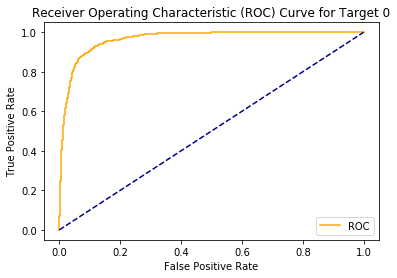

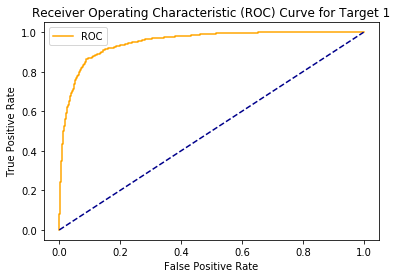

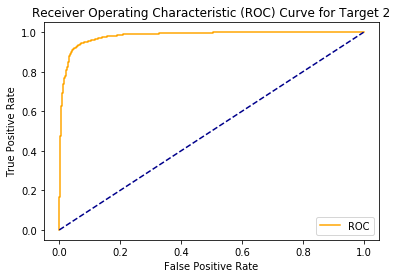

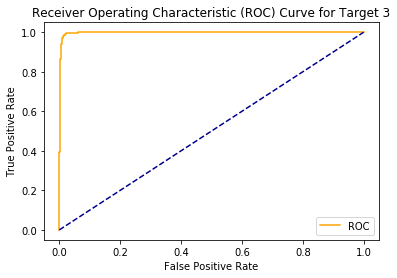

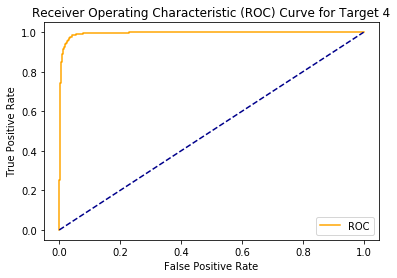

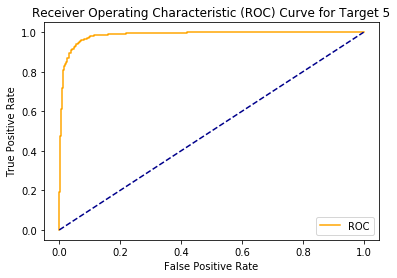

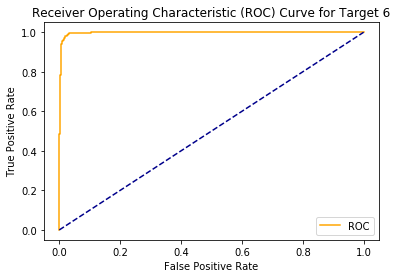

In [106]:
plot_roc_cur_multiclass(xgb_random.best_estimator_,x_test,y_test,7)


Model Report


C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy (Train) : 1
Accuracy (Test) : 0.8536
AUC Score for Target 0 (Train): 1.000000
AUC Score for Target 0 (Test): 0.965537
AUC Score for Target 1 (Train): 1.000000
AUC Score for Target 1 (Test): 0.949561
AUC Score for Target 2 (Train): 1.000000
AUC Score for Target 2 (Test): 0.981034
AUC Score for Target 3 (Train): 1.000000
AUC Score for Target 3 (Test): 0.998050
AUC Score for Target 4 (Train): 1.000000
AUC Score for Target 4 (Test): 0.994608
AUC Score for Target 5 (Train): 1.000000
AUC Score for Target 5 (Test): 0.985372
AUC Score for Target 6 (Train): 1.000000
AUC Score for Target 6 (Test): 0.997152
Variable: Soil_Type40          Importance: 0.10999999940395355
Variable: Wilderness_Area4     Importance: 0.09000000357627869
Variable: Soil_Type37          Importance: 0.07000000029802322
Variable: Soil_Type18          Importance: 0.05999999865889549
Variable: Soil_Type38          Importance: 0.05999999865889549
Variable: Soil_Type39          Importance: 0.05999999865889549
Variable:

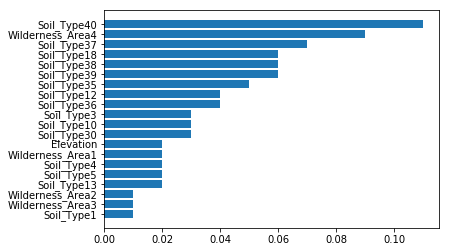

In [107]:
modelfit_multiclass(xgb_random.best_estimator_, x_train, y_train, x_test, y_test, num_class=7)

### Prediction On Test 

In [108]:
X_wo_truth_new_preds = xgb_random.best_estimator_.predict(df_test.drop(['Id'],axis=1))  
X_wo_truth_new_preds = X_wo_truth_new_preds +1 
data ={
    'Id': list(df_test['Id']),
    'Cover_Type': list(X_wo_truth_new_preds)
}
submission = pd.DataFrame(data)

submission.to_csv('20210314_submission_2_XGBoost_Random_Search.csv')

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
